In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import missingno as msno
import statistics
import seaborn

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D206DataCleaning/churn_raw_data.csv")

In [3]:
# Take a first glance into the characteristics of the dataset
# churned_data.info()
churned_data.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(churned_data.shape)


duplicates = churned_data.duplicated(keep = False)
duplicates.value_counts()

(10000, 52)


False    10000
dtype: int64

In [5]:
## Thus we can see that there are no instances of "True" so we can conclude that every row is its own unique instance 
# and we do not need to edit any duplicate values

In [6]:
# Just to double check that we don't have duplicates, I'm going to do a quick check on the Customer_id column. 
# Since we saw the shape of the dataframe is 10,000 rows and 52 columns, I should expect 10000 unique customer IDs 
# [In text citation: Bowne-Anderson, H. (n.d)]
churned_data["Customer_id"].nunique()

10000

In [7]:
# Now that we see that we have 10,000 unique customer IDs, I can comfortably conclude that we have no duplicate values

In [8]:
# Based on the data, I found that there are 11 quantitative variables. I'm going to focus on the data cleaning for them first 
# and will attempt to make it easy to check them. They are as follows: "Population", "Children", "Age", "Income",
# "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
churned_data.isna().sum()
#churned_data.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

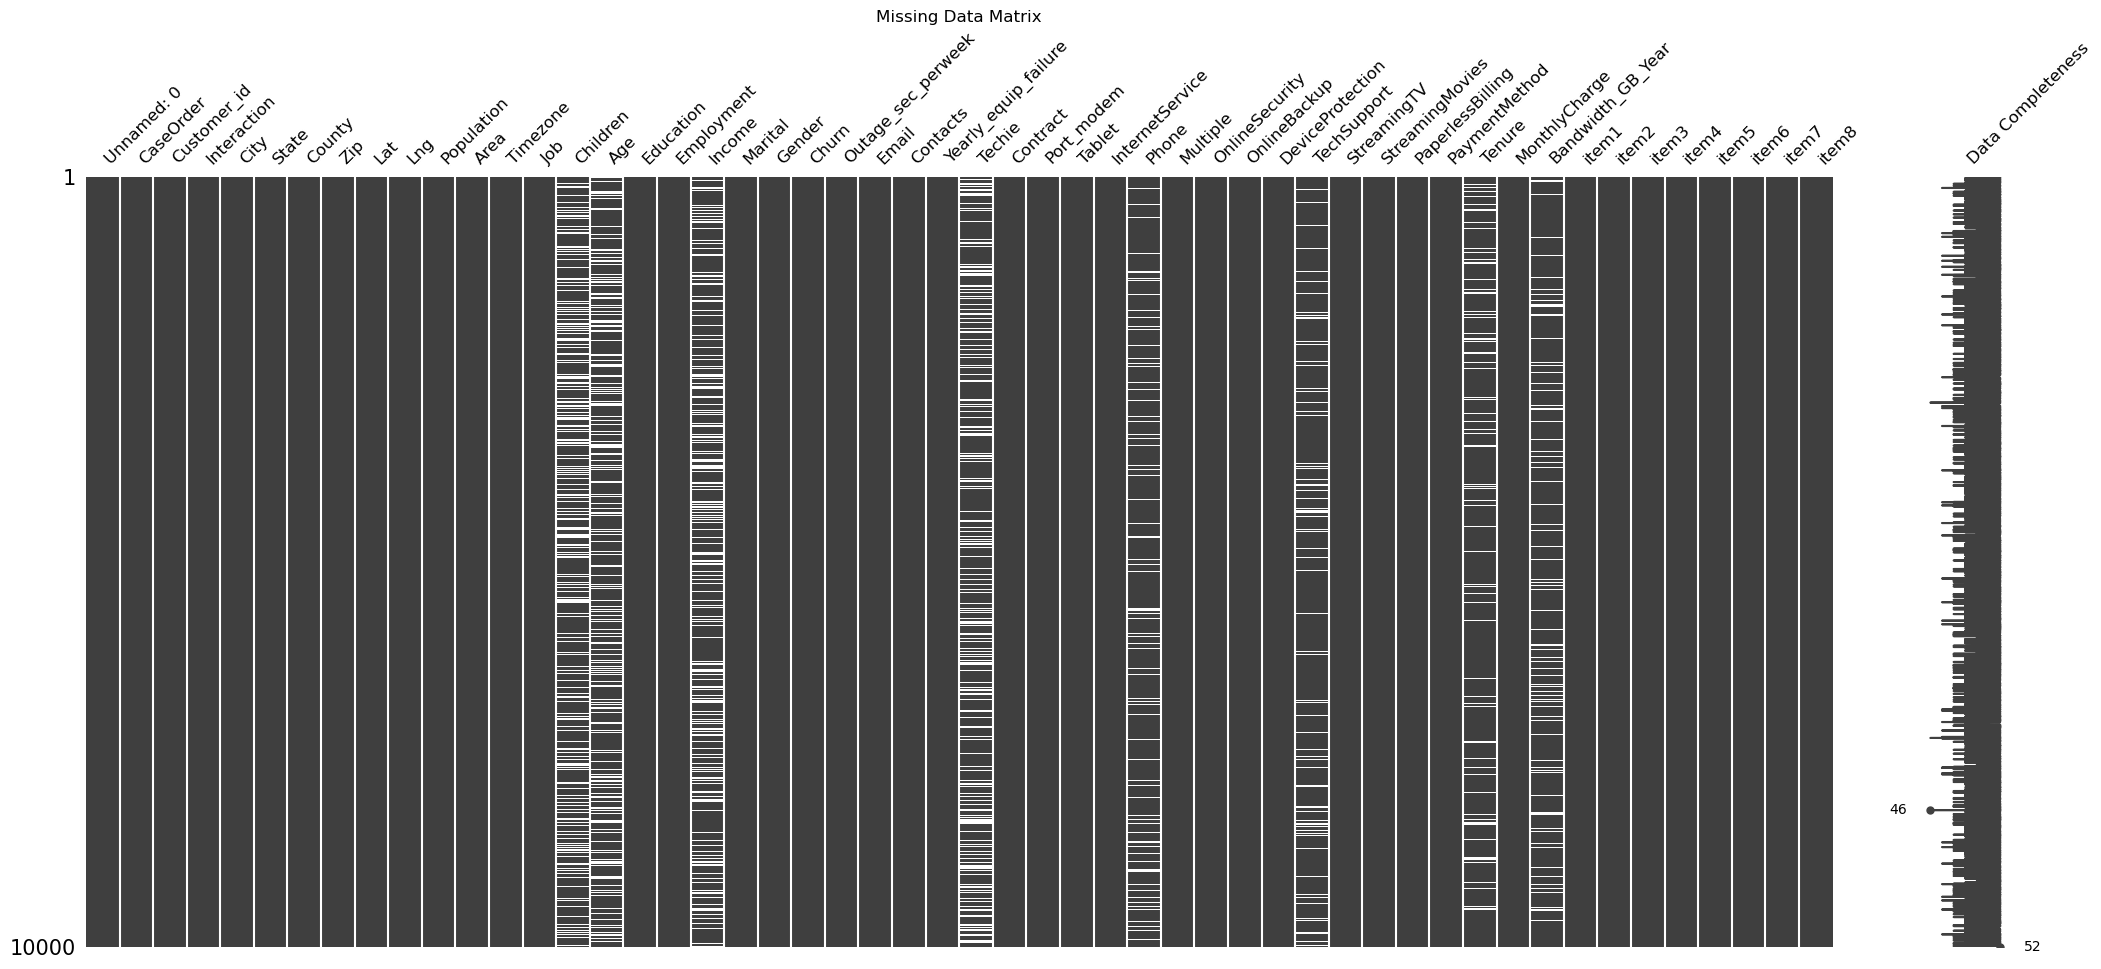

In [9]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(churned_data, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [10]:
# Of the columns with missing values, the ones that are quantitative are: "Children", "Age", "Income", "Tenure", and "Bandwidth"
# In order to figure out how to fix the missing values, I will look at a histogram of the data to try and find
# any patterns in the data.

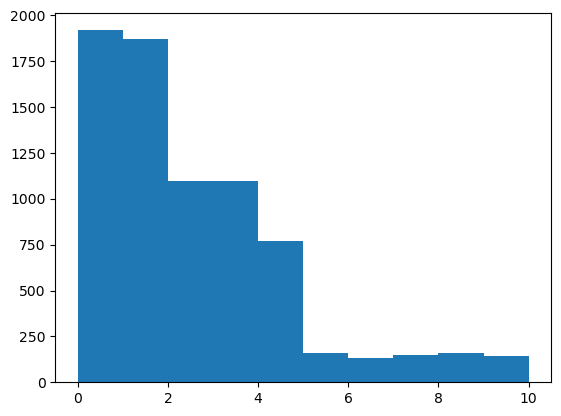

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64
Median:  1.0


In [11]:
# Checking histogram for Children
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(churned_data["Children"])
plt.show()

# Check the statistics of the data before editing
print(churned_data["Children"].describe())
print("Median: ", churned_data["Children"].median())

count    10000.000000
mean         1.822500
std          1.925971
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64
Median:  1.0
Amount of missing values:  0


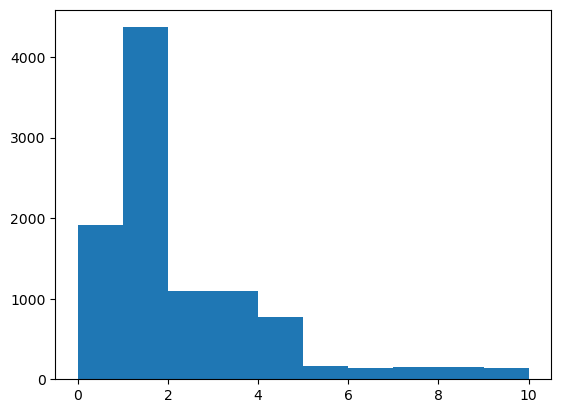

In [12]:
# We can see here that the distribution of number of children is skewed to the right, which makes intuitive sense as well.
# I am going to then impute the NA values with the median per the code in the Section 3 Lesson 5 "Missing Data" page of the
# course material. I will then check for any values of NA and reprint the Histogram to check for the same distribution. Also
# will be looking at the statistics to verify they are the same before and after imputing
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Children"].fillna(churned_data["Children"].median(), inplace = True)

print(churned_data["Children"].describe())
print("Median: ", churned_data["Children"].median())

print("Amount of missing values: ", churned_data["Children"].isna().sum())

plt.hist(churned_data["Children"])
plt.show()

In [13]:
# The distribution looks relatively the same as before. The big spike makes sense since we imputed the median but the overall
# look of the distribution still appears to be skewed right. The mean is less than before but that makes sense because
# I imputed with the median. The median did not change which is ideal. 
# I will now look at the other quantatitive columns with missing values

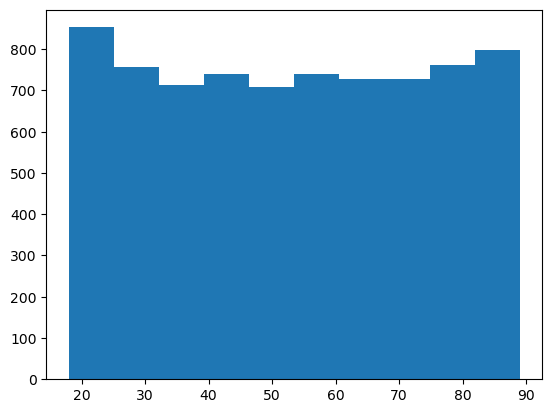

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64
Median:  53.0


In [14]:
# Checking histogram for Age
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

plt.hist(churned_data["Age"])
plt.show()

# Check the statistics of the data before editing
print(churned_data["Age"].describe())
print("Median: ", churned_data["Age"].median())

count    10000.000000
mean        53.207500
std         18.003457
min         18.000000
25%         41.000000
50%         53.000000
75%         65.000000
max         89.000000
Name: Age, dtype: float64
Median:  53.0
Number of missing values:  0


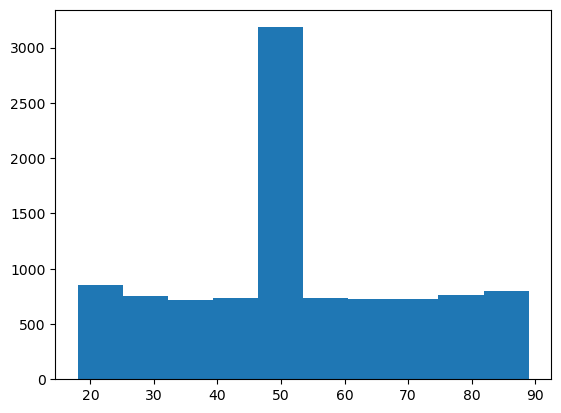

In [15]:
# Age looks to be uniform so I will replace the missing values in age with the mean and then rerun the graph
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Age"].fillna(churned_data["Age"].mean().astype('int64'), inplace = True)
# I used the .astype('int64') as a way to round the age to the nearest int

# Check the statistics of the data after editing
print(churned_data["Age"].describe())
print("Median: ", churned_data["Age"].median())

print("Number of missing values: ", churned_data["Age"].isna().sum())

plt.hist(churned_data["Age"])
plt.show()

In [16]:
# Although not as obviously uniform, this distribution does not look normal and the imputed values would make ~50 years old
# appear much more often since we are imputing 2475 values. I think the distribution here is still ok since we can see that 
# the mean did not change in value before vs after

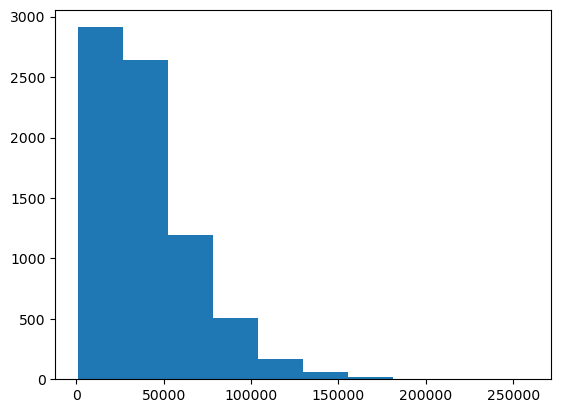

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64
Median:  33186.785


In [17]:
# Checking histogram for Income
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

plt.hist(churned_data["Income"])
plt.show()

# Check the statistics of the data before editing
print(churned_data["Income"].describe())
print("Median: ", churned_data["Income"].median())

In [18]:
# Similar to the Children column, the income column is also skewed right which makes sense intuitively as well

count     10000.000000
mean      38256.017897
std       24747.872761
min         740.660000
25%       23660.790000
50%       33186.785000
75%       45504.192500
max      258900.700000
Name: Income, dtype: float64
Median:  33186.785
0


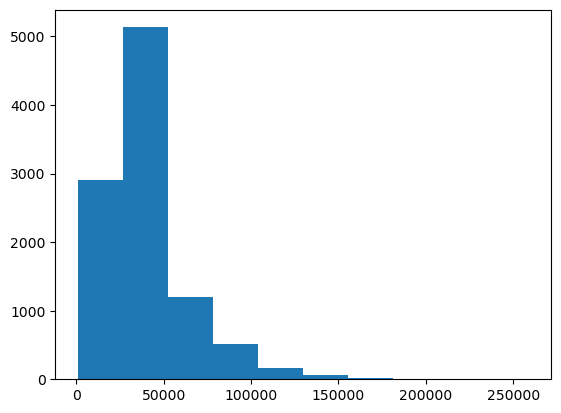

In [19]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Income"].fillna(churned_data["Income"].median(), inplace = True)

# Check the statistics of the data after editing
print(churned_data["Income"].describe())
print("Median: ", churned_data["Income"].median())

print(churned_data["Income"].isna().sum())

plt.hist(churned_data["Income"])
plt.show()

In [20]:
# Again similar to the Children column, the mean lowered but the median remained the same and the distribution still looks good

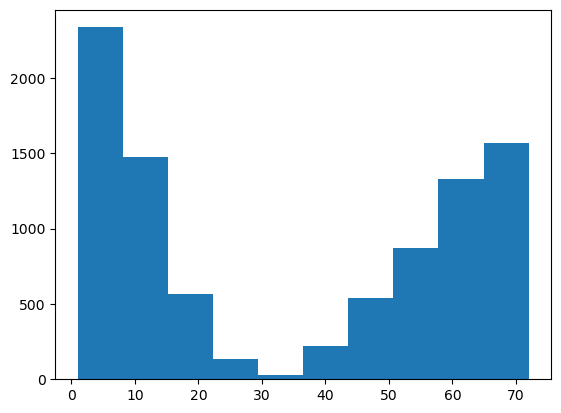

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64
Median:  36.19603


In [21]:
# Checking histogram for Tenure
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

plt.hist(churned_data["Tenure"])
plt.show()

# Check the statistics of the data before editing
print(churned_data["Tenure"].describe())
print("Median: ", churned_data["Tenure"].median())

count    10000.000000
mean        34.656864
std         25.182812
min          1.000259
25%          8.700329
50%         36.196030
75%         60.153487
max         71.999280
Name: Tenure, dtype: float64
Median:  36.19603
0


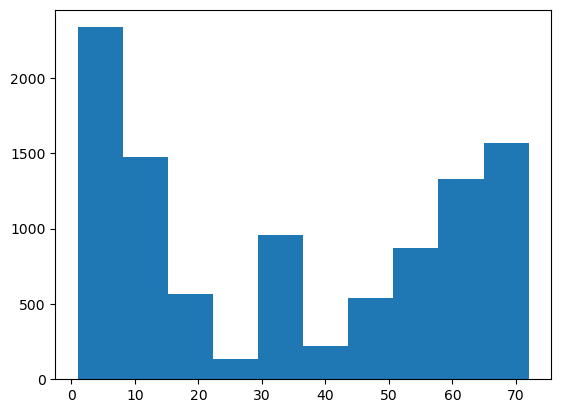

In [22]:
# Tenure looks to be bimodal so I will replace the missing values with the median per Dr. Middleton's lecture D206 - Getting Started with D206 | Missing Values
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Tenure"].fillna(churned_data["Tenure"].median(), inplace = True)

# Check the statistics of the data after editing
print(churned_data["Tenure"].describe())
print("Median: ", churned_data["Tenure"].median())

print(churned_data["Tenure"].isna().sum())

plt.hist(churned_data["Tenure"])
plt.show()

In [23]:
# The mean stayed roughly the same and the median stayed exactly the same. The distributions still looks generally bimodal
# even with the spike in the middle so I think it's ok to leave it at that

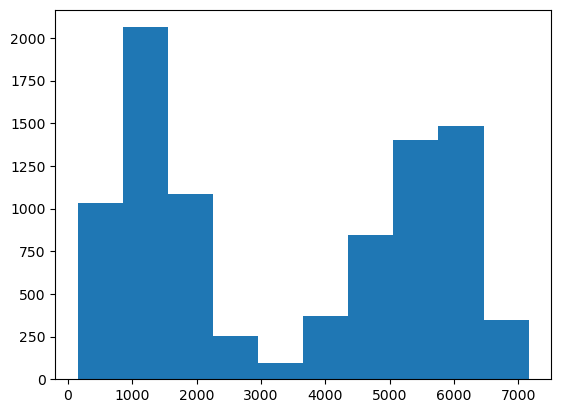

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64
Median:  3382.424


In [24]:
# Checking histogram for Bandwidth
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

plt.hist(churned_data["Bandwidth_GB_Year"])
plt.show()

# Check the statistics of the data before editing
print(churned_data["Bandwidth_GB_Year"].describe())
print("Median: ", churned_data["Bandwidth_GB_Year"].median())

count    10000.000000
mean      3397.166397
std       2072.718575
min        155.506715
25%       1312.130487
50%       3382.424000
75%       5466.284500
max       7158.982000
Name: Bandwidth_GB_Year, dtype: float64
Median:  3382.424
0


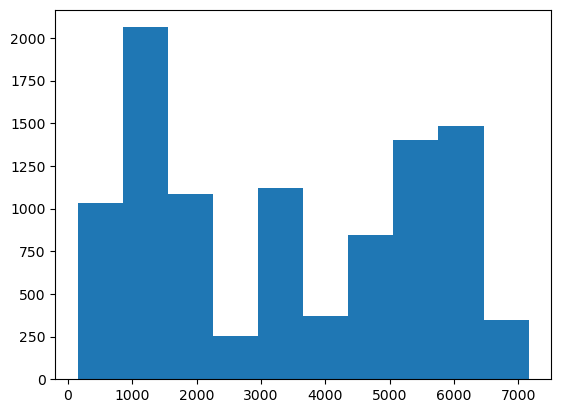

In [25]:
# Bandwidth_GB_Year looks to be bimodal so I will replace the missing values with the median per Dr. Middleton's lecture D206 - Getting Started with D206 | Missing Values
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Bandwidth_GB_Year"].fillna(churned_data["Bandwidth_GB_Year"].median(), inplace = True)

# Check the statistics of the data after editing
print(churned_data["Bandwidth_GB_Year"].describe())
print("Median: ", churned_data["Bandwidth_GB_Year"].median())

print(churned_data["Bandwidth_GB_Year"].isna().sum())

plt.hist(churned_data["Bandwidth_GB_Year"])
plt.show()

In [26]:
# The mean stayed roughly the same and the median stayed exactly the same. The distributions still looks generally bimodal
# even with the spike in the middle so I think it's ok to leave it at that

In [27]:
# Going to re-check the entire data set for missing values. It should just be the categrorical entries
churned_data.isna().sum()

# The last 3 with missing values are all Yes/No questions which would be categorical so I will treat those now

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

NA Value Count:  2477
No     6266
Yes    1257
Name: Techie, dtype: int64


<Axes: >

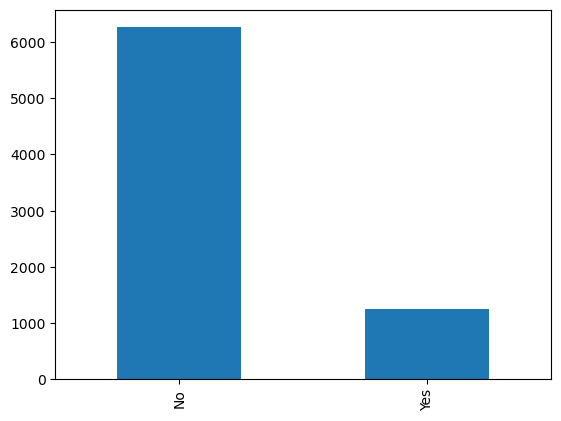

In [28]:
# Checking the outputs of the Techie column to verify there is nothing but Yes, No, or NA
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

print("NA Value Count: ", churned_data["Techie"].isna().sum())

print(churned_data["Techie"].value_counts())

churned_data["Techie"].value_counts().plot(kind = 'bar')

NA Value Count:  0
No     8743
Yes    1257
Name: Techie, dtype: int64


<Axes: >

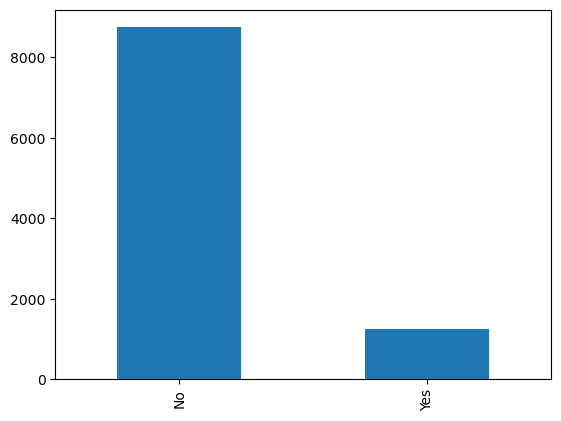

In [29]:
# Since it looks good and the missing values added with the count of all values equals 10,000 I will impute the mode onto the
# missing values and recheck
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Techie"].fillna(churned_data["Techie"].mode()[0], inplace = True)

print("NA Value Count: ", churned_data["Techie"].isna().sum())
print(churned_data["Techie"].value_counts())

churned_data["Techie"].value_counts().plot(kind = 'bar')

NA Value Count:  1026
Yes    8128
No      846
Name: Phone, dtype: int64


<Axes: >

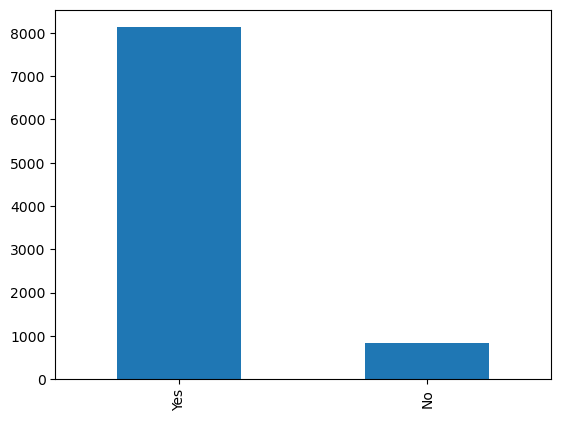

In [30]:
# Checking the outputs of the Phone column to verify there is nothing but Yes, No, or NA
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

print("NA Value Count: ", churned_data["Phone"].isna().sum())

print(churned_data["Phone"].value_counts())

churned_data["Phone"].value_counts().plot(kind = 'bar')

NA Value Count:  0
Yes    9154
No      846
Name: Phone, dtype: int64


<Axes: >

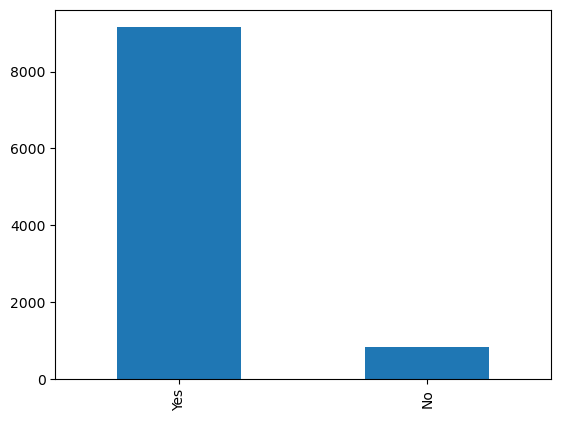

In [31]:
# Since it looks good and the missing values added with the count of all values equals 10,000 I will impute the mode onto the
# missing values and recheck
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["Phone"].fillna(churned_data["Phone"].mode()[0], inplace = True)

print("NA Value Count: ", churned_data["Phone"].isna().sum())
print(churned_data["Phone"].value_counts())

churned_data["Phone"].value_counts().plot(kind = 'bar')

NA Value Count:  991
No     5635
Yes    3374
Name: TechSupport, dtype: int64


<Axes: >

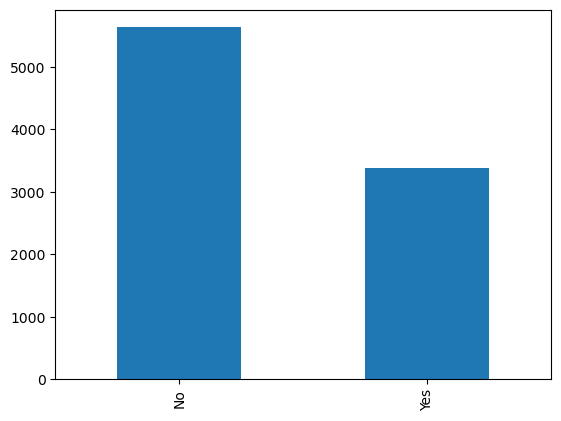

In [32]:
# Checking the outputs of the TechSupport column to verify there is nothing but Yes, No, or NA
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

print("NA Value Count: ", churned_data["TechSupport"].isna().sum())

print(churned_data["TechSupport"].value_counts())

churned_data["TechSupport"].value_counts().plot(kind = 'bar')

NA Value Count:  0
No     6626
Yes    3374
Name: TechSupport, dtype: int64


<Axes: >

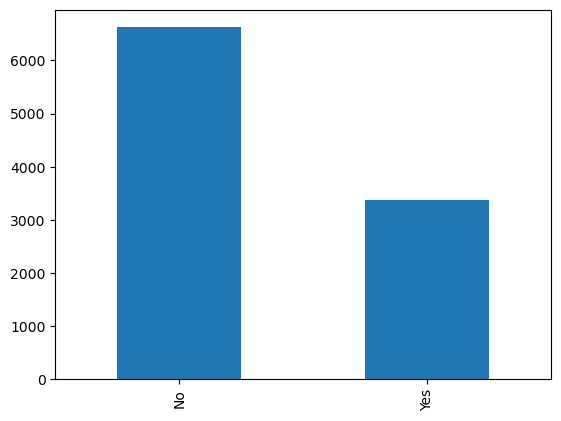

In [33]:
# Since it looks good and the missing values added with the count of all values equals 10,000 I will impute the mode onto the
# missing values and recheck
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]

churned_data["TechSupport"].fillna(churned_data["TechSupport"].mode()[0], inplace = True)

print("NA Value Count: ", churned_data["TechSupport"].isna().sum())
print(churned_data["TechSupport"].value_counts())

churned_data["TechSupport"].value_counts().plot(kind = 'bar')

In [34]:
# One last check to see if we have any missing values
churned_data.isna().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [35]:
















## TIME FOR THE OUTLIER DETECTION PART

















<function matplotlib.pyplot.show(close=None, block=None)>

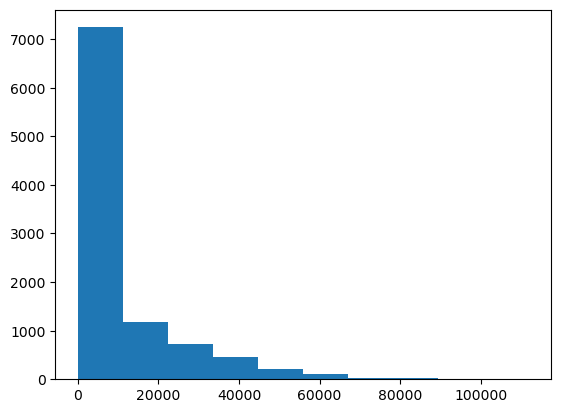

In [36]:
# As we can see, we now no longer have any missing values! The next step is to move on to detecting outliers in the 
# numerical variables. They are: "Population", "Children", "Age", "Income",
# "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"

plt.hist(churned_data["Population"])
plt.show

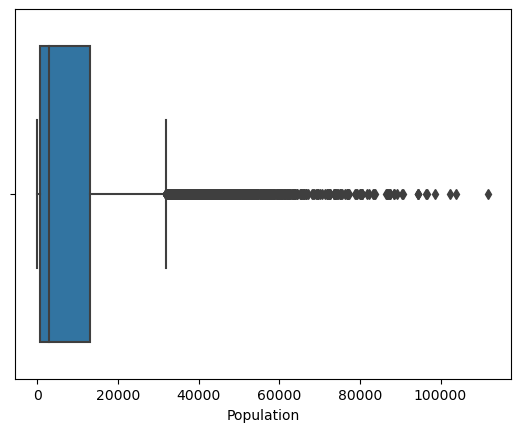

In [37]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_population = seaborn.boxplot(x = "Population", data = churned_data)

In [38]:
pop_q1, pop_q3 = np.percentile(churned_data["Population"], [25,75])
print(pop_q1, pop_q3)

pop_iqr = pop_q3 - pop_q1
print(pop_iqr)

pop_lower_limit = pop_q1 - (1.5*pop_iqr)
pop_upper_limit = pop_q3 + (1.5*pop_iqr)
print(pop_lower_limit, pop_upper_limit)

# Since no outliers are to the left, I will check the max outlier to check the range of outliers
#print("Min Range of Outliers: ", churned_data["Population"].min())
print("Max Range of Outliers: ", pop_upper_limit + 1, "to", churned_data["Population"].max())

## Added +1 to the range to account for anything greater than the max range of non-outliers
## and since population can only be an integer it should be ok

738.0 13168.0
12430.0
-17907.0 31813.0
Max Range of Outliers:  31814.0 to 111850


In [39]:
print(churned_data[churned_data["Population"] > pop_upper_limit].count())
print(churned_data[churned_data["Population"] < pop_lower_limit].count())


## Since almost 10% of the data are considered outliers, I think it would be 
## best to RETAIN the outliers of this data. Although retaining will reduce
## normality for the statistical tests, you would expect that the number of 
## people living in an area would fluctuate a lot. We can see this in the 
## data as less populated places appear to be more common, but the outliers
## don't seem to extreme in terms of expectability. For example, a customer 
## who lives in Chicago shouldn't be excluded just because they live in a 
## major, dense city otherwise we would introduce bias against major cities

Unnamed: 0              937
CaseOrder               937
Customer_id             937
Interaction             937
City                    937
State                   937
County                  937
Zip                     937
Lat                     937
Lng                     937
Population              937
Area                    937
Timezone                937
Job                     937
Children                937
Age                     937
Education               937
Employment              937
Income                  937
Marital                 937
Gender                  937
Churn                   937
Outage_sec_perweek      937
Email                   937
Contacts                937
Yearly_equip_failure    937
Techie                  937
Contract                937
Port_modem              937
Tablet                  937
InternetService         937
Phone                   937
Multiple                937
OnlineSecurity          937
OnlineBackup            937
DeviceProtection    

<function matplotlib.pyplot.show(close=None, block=None)>

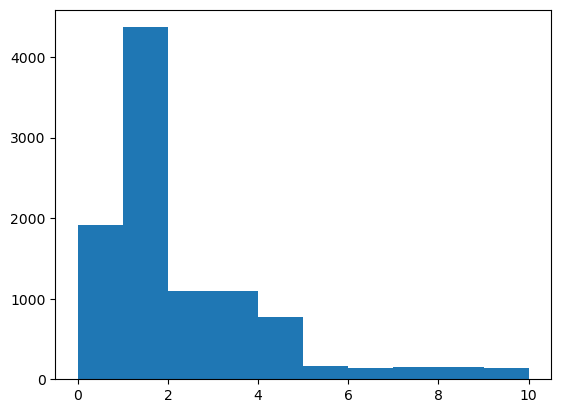

In [40]:
#"Children", "Age", "Income",
# "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"
plt.hist(churned_data["Children"])
plt.show

# Skewed right, will try boxplots

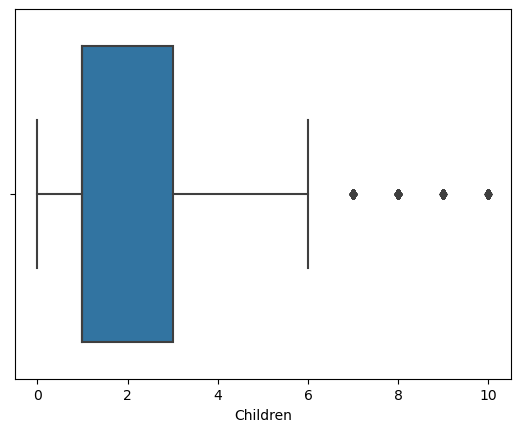

In [41]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_children = seaborn.boxplot(x = "Children", data = churned_data)

In [42]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Children_q1, Children_q3 = np.percentile(churned_data["Children"], [25,75])
print(Children_q1, Children_q3)

Children_iqr = Children_q3 - Children_q1
print(Children_iqr)

Children_lower_limit = Children_q1 - (1.5*Children_iqr)
Children_upper_limit = Children_q3 + (1.5*Children_iqr)
print(Children_lower_limit, Children_upper_limit)


# Since no outliers are to the left, I will check the max outlier to check the range of outliers
#print("Min Range of Outliers: ", churned_data["Children"].min())
print("Max Range of Outliers: ", Children_upper_limit + 1, "to", churned_data["Children"].max())

1.0 3.0
2.0
-2.0 6.0
Max Range of Outliers:  7.0 to 10.0


In [43]:
# Check the query for how many outliers there are
churned_data[churned_data["Children"] > Children_upper_limit].count()


## Likely going to RETAIN

Unnamed: 0              451
CaseOrder               451
Customer_id             451
Interaction             451
City                    451
State                   451
County                  451
Zip                     451
Lat                     451
Lng                     451
Population              451
Area                    451
Timezone                451
Job                     451
Children                451
Age                     451
Education               451
Employment              451
Income                  451
Marital                 451
Gender                  451
Churn                   451
Outage_sec_perweek      451
Email                   451
Contacts                451
Yearly_equip_failure    451
Techie                  451
Contract                451
Port_modem              451
Tablet                  451
InternetService         451
Phone                   451
Multiple                451
OnlineSecurity          451
OnlineBackup            451
DeviceProtection    

<function matplotlib.pyplot.show(close=None, block=None)>

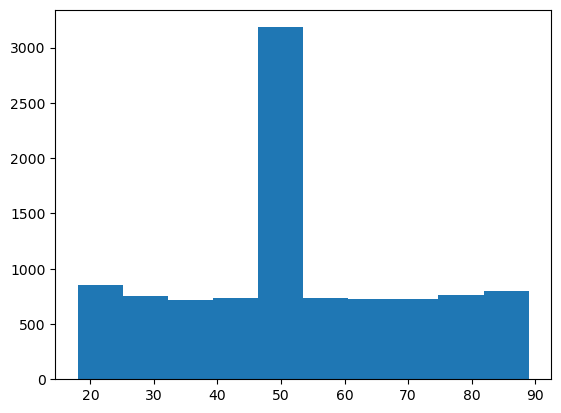

In [44]:
plt.hist(churned_data["Age"])
plt.show

# Uniform, will try boxplots

41.0 65.0
24.0
5.0 101.0


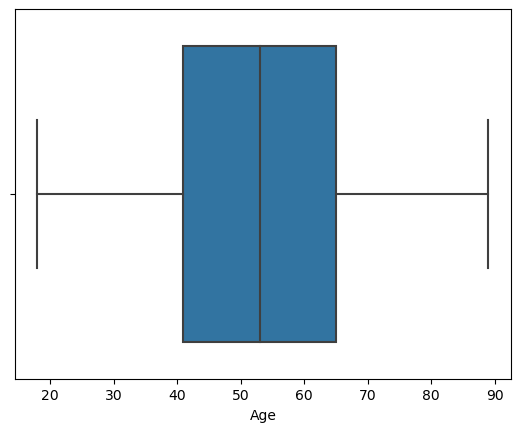

In [45]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Age_q1, Age_q3 = np.percentile(churned_data["Age"], [25,75])
print(Age_q1, Age_q3)

Age_iqr = Age_q3 - Age_q1
print(Age_iqr)

Age_lower_limit = Age_q1 - (1.5*Age_iqr)
Age_upper_limit = Age_q3 + (1.5*Age_iqr)
print(Age_lower_limit, Age_upper_limit)

boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data)

In [46]:
# No outliers for Age!

<function matplotlib.pyplot.show(close=None, block=None)>

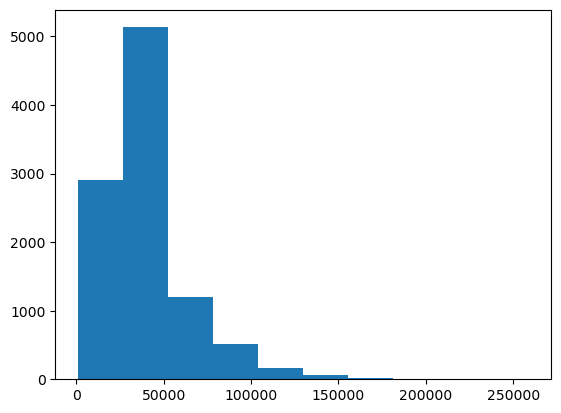

In [47]:
plt.hist(churned_data["Income"])
plt.show

# Skewed right, will try boxplots

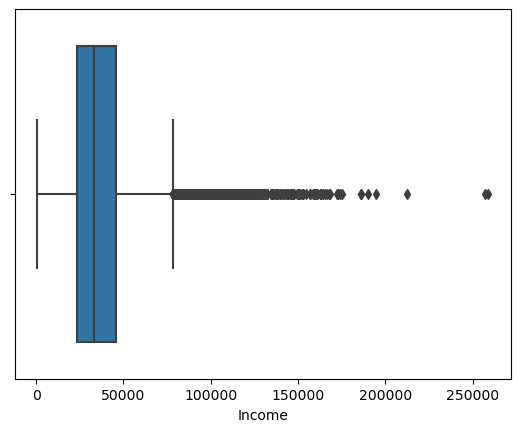

In [48]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_Income = seaborn.boxplot(x = "Income", data = churned_data)

In [49]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Income_q1, Income_q3 = np.percentile(churned_data["Income"], [25,75])
print(Income_q1, Income_q3)

Income_iqr = Income_q3 - Income_q1
print(Income_iqr)

Income_lower_limit = Income_q1 - (1.5*Income_iqr)
Income_upper_limit = Income_q3 + (1.5*Income_iqr)
print(Income_lower_limit, Income_upper_limit)


# Since no outliers are to the left, I will check the max outlier to check the range of outliers
#print("Min Range of Outliers: ", churned_data["Income"].min())
print("Max Range of Outliers: ", Income_upper_limit + 1, "to", churned_data["Income"].max())

23660.79 45504.1925
21843.402499999997
-9104.313749999994 78269.29624999998
Max Range of Outliers:  78270.29624999998 to 258900.7


In [50]:
# Check the query for how many outliers there are
churned_data[churned_data["Income"] > Income_upper_limit].count()


## Going to EXCLUDE these and recheck

Unnamed: 0              759
CaseOrder               759
Customer_id             759
Interaction             759
City                    759
State                   759
County                  759
Zip                     759
Lat                     759
Lng                     759
Population              759
Area                    759
Timezone                759
Job                     759
Children                759
Age                     759
Education               759
Employment              759
Income                  759
Marital                 759
Gender                  759
Churn                   759
Outage_sec_perweek      759
Email                   759
Contacts                759
Yearly_equip_failure    759
Techie                  759
Contract                759
Port_modem              759
Tablet                  759
InternetService         759
Phone                   759
Multiple                759
OnlineSecurity          759
OnlineBackup            759
DeviceProtection    

<function matplotlib.pyplot.show(close=None, block=None)>

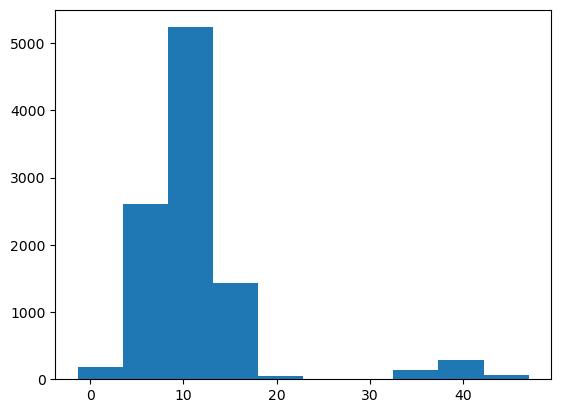

In [51]:
plt.hist(churned_data["Outage_sec_perweek"])
plt.show

# Looks normal outside of the edge cases, will try boxplots

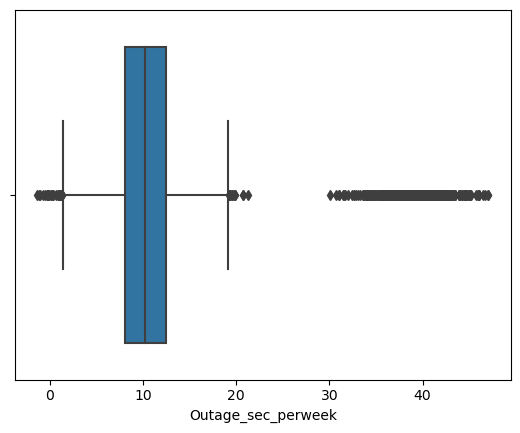

In [52]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_Outage = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

In [53]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Outage_q1, Outage_q3 = np.percentile(churned_data["Outage_sec_perweek"], [25,75])
print(Outage_q1, Outage_q3)

Outage_iqr = Outage_q3 - Outage_q1
print(Outage_iqr)

Outage_lower_limit = Outage_q1 - (1.5*Outage_iqr)
Outage_upper_limit = Outage_q3 + (1.5*Outage_iqr)
print(Outage_lower_limit, Outage_upper_limit)


# I will check the max and min outlier to check the range of outliers
print("Min Range of Outliers: ", churned_data["Outage_sec_perweek"].min(), "To", Outage_lower_limit)
print("Max Range of Outliers: ", Outage_upper_limit, "To", churned_data["Outage_sec_perweek"].max() )

8.054362000000001 12.487643622499998
4.433281622499997
1.404439566250005 19.137566056249995
Min Range of Outliers:  -1.348571 To 1.404439566250005
Max Range of Outliers:  19.137566056249995 To 47.04928


In [54]:
# Check the query for how many outliers there are
print(churned_data[churned_data["Outage_sec_perweek"] > Outage_upper_limit].count())
print(churned_data[churned_data["Outage_sec_perweek"] < Outage_lower_limit].count())

## Based on histogram, will exclude data points that are greater than 27. Although there are 500 instances of that and they
## Look like a normal distribution. Might reclassify outages into two separate categories so as to not remove 500 entries

Unnamed: 0              513
CaseOrder               513
Customer_id             513
Interaction             513
City                    513
State                   513
County                  513
Zip                     513
Lat                     513
Lng                     513
Population              513
Area                    513
Timezone                513
Job                     513
Children                513
Age                     513
Education               513
Employment              513
Income                  513
Marital                 513
Gender                  513
Churn                   513
Outage_sec_perweek      513
Email                   513
Contacts                513
Yearly_equip_failure    513
Techie                  513
Contract                513
Port_modem              513
Tablet                  513
InternetService         513
Phone                   513
Multiple                513
OnlineSecurity          513
OnlineBackup            513
DeviceProtection    

<function matplotlib.pyplot.show(close=None, block=None)>

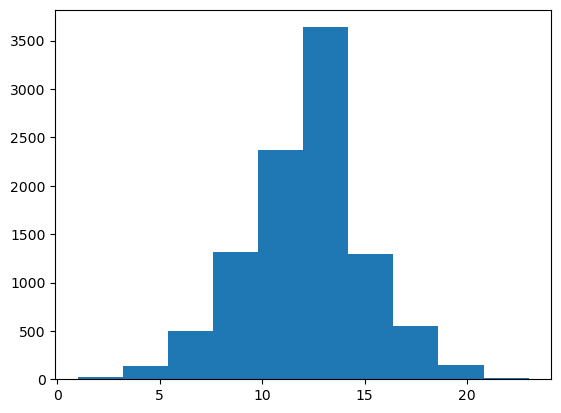

In [55]:
plt.hist(churned_data["Email"])
plt.show

# Looks normally distributed, will try z-scores and then boxplots

<function matplotlib.pyplot.show(close=None, block=None)>

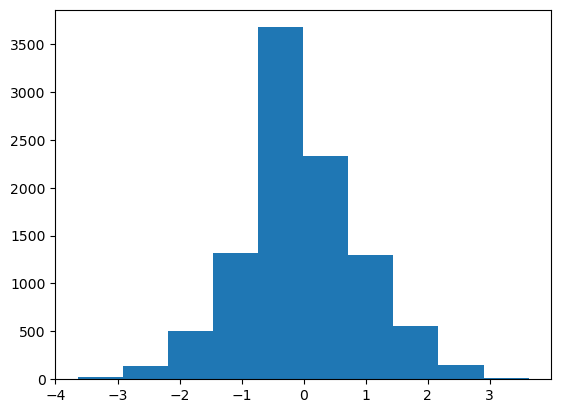

In [56]:
# Checking Z-scores for "Email"
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

churned_data["Z_Score_Email"] = stats.zscore(churned_data["Email"])
#churned_data[["Email", "Z_Score_Email"]].head()

plt.hist(churned_data["Z_Score_Email"])
plt.show

<Axes: xlabel='Z_Score_Email'>

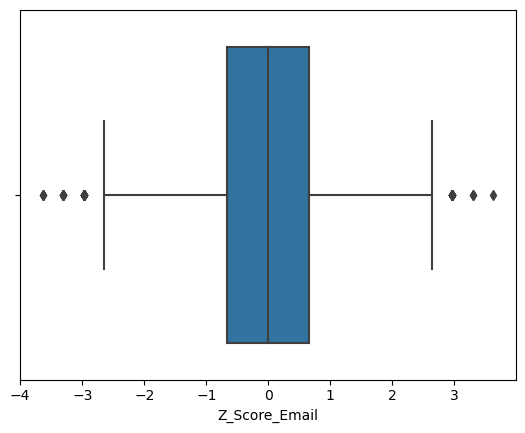

In [57]:
seaborn.boxplot(x = "Z_Score_Email", data = churned_data)

In [58]:
# Looks like there might be a few outliers outside of 3 SD away so I will check to see how many
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

churned_data.query("Z_Score_Email > 3 | Z_Score_Email < -3").info()


## Thinking I will EXCLUDE. Few amount of entries


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 795 to 9475
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            12 non-null     int64  
 1   CaseOrder             12 non-null     int64  
 2   Customer_id           12 non-null     object 
 3   Interaction           12 non-null     object 
 4   City                  12 non-null     object 
 5   State                 12 non-null     object 
 6   County                12 non-null     object 
 7   Zip                   12 non-null     int64  
 8   Lat                   12 non-null     float64
 9   Lng                   12 non-null     float64
 10  Population            12 non-null     int64  
 11  Area                  12 non-null     object 
 12  Timezone              12 non-null     object 
 13  Job                   12 non-null     object 
 14  Children              12 non-null     float64
 15  Age                  

In [59]:
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Email_q1, Email_q3 = np.percentile(churned_data["Email"], [25,75])
print(Email_q1, Email_q3)

Email_iqr = Email_q3 - Email_q1
print(Email_iqr)

Email_lower_limit = Email_q1 - (1.5*Email_iqr)
Email_upper_limit = Email_q3 + (1.5*Email_iqr)
print(Email_lower_limit, Email_upper_limit)


# I will check the max and min outlier to check the range of outliers
print("Min Range of Outliers: ", churned_data["Email"].min(), "To", Email_lower_limit - 1)
print("Max Range of Outliers: ", Email_upper_limit + 1, "To", churned_data["Email"].max() )

10.0 14.0
4.0
4.0 20.0
Min Range of Outliers:  1 To 3.0
Max Range of Outliers:  21.0 To 23


In [60]:
# Check the query for how many outliers there are
print(churned_data[churned_data["Z_Score_Email"] > Email_upper_limit].count())
print(churned_data[churned_data["Z_Score_Email"] < Email_lower_limit].count())



Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

<function matplotlib.pyplot.show(close=None, block=None)>

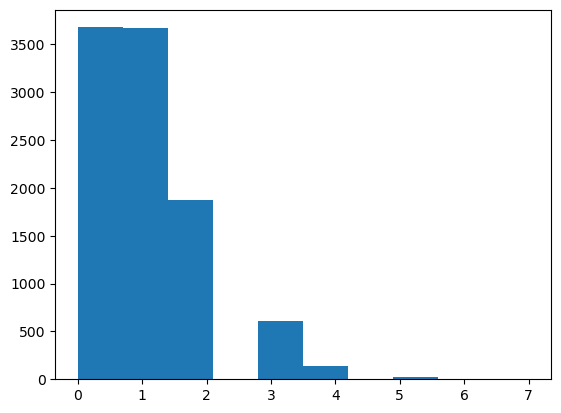

In [61]:
plt.hist(churned_data["Contacts"])
plt.show

# Looks skewed right, will try boxplots

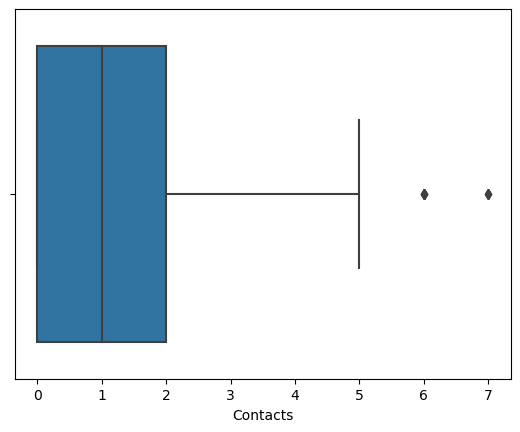

In [62]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_Contacts = seaborn.boxplot(x = "Contacts", data = churned_data)

In [63]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Contacts_q1, Contacts_q3 = np.percentile(churned_data["Contacts"], [25,75])
print(Contacts_q1, Contacts_q3)

Contacts_iqr = Contacts_q3 - Contacts_q1
print(Contacts_iqr)

Contacts_lower_limit = Contacts_q1 - (1.5*Contacts_iqr)
Contacts_upper_limit = Contacts_q3 + (1.5*Contacts_iqr)
print(Contacts_lower_limit, Contacts_upper_limit)


# I will check the max outlier to check the range of outliers
#print("Min Range of Outliers: ", churned_data["Email"].min(), "To", Email_lower_limit - 1)
print("Max Range of Outliers: ", Contacts_upper_limit + 1, "To", churned_data["Contacts"].max() )

0.0 2.0
2.0
-3.0 5.0
Max Range of Outliers:  6.0 To 7


In [64]:
# Check the query for how many outliers there are
churned_data[churned_data["Contacts"] > Contacts_upper_limit].count()

## EXCLUDE. Only 8 instances

Unnamed: 0              8
CaseOrder               8
Customer_id             8
Interaction             8
City                    8
State                   8
County                  8
Zip                     8
Lat                     8
Lng                     8
Population              8
Area                    8
Timezone                8
Job                     8
Children                8
Age                     8
Education               8
Employment              8
Income                  8
Marital                 8
Gender                  8
Churn                   8
Outage_sec_perweek      8
Email                   8
Contacts                8
Yearly_equip_failure    8
Techie                  8
Contract                8
Port_modem              8
Tablet                  8
InternetService         8
Phone                   8
Multiple                8
OnlineSecurity          8
OnlineBackup            8
DeviceProtection        8
TechSupport             8
StreamingTV             8
StreamingMov

<function matplotlib.pyplot.show(close=None, block=None)>

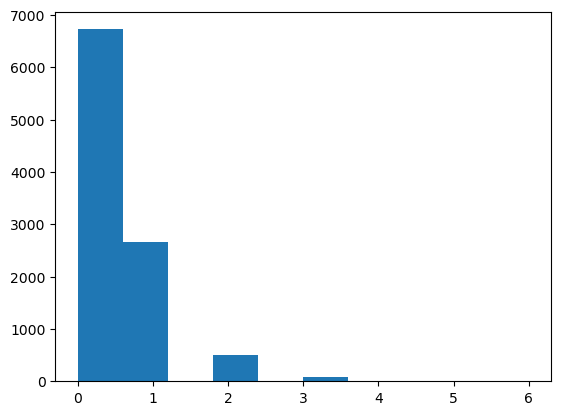

In [65]:
plt.hist(churned_data["Yearly_equip_failure"])
plt.show

# Looks skewed right, will try boxplots

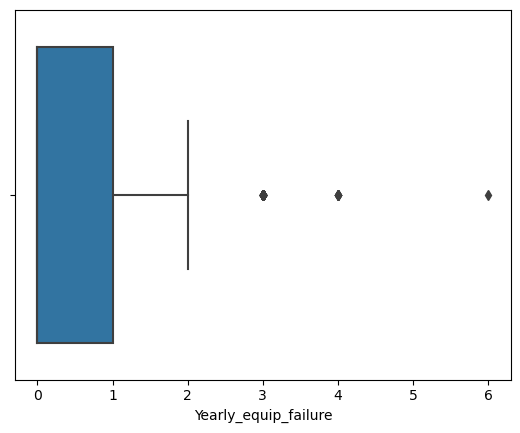

In [66]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_Yearly_equip_failure = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

In [67]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Yearly_equip_failure_q1, Yearly_equip_failure_q3 = np.percentile(churned_data["Yearly_equip_failure"], [25,75])
print(Yearly_equip_failure_q1, Yearly_equip_failure_q3)

Yearly_equip_failure_iqr = Yearly_equip_failure_q3 - Yearly_equip_failure_q1
print(Yearly_equip_failure_iqr)

Yearly_equip_failure_lower_limit = Yearly_equip_failure_q1 - (1.5*Yearly_equip_failure_iqr)
Yearly_equip_failure_upper_limit = Yearly_equip_failure_q3 + (1.5*Yearly_equip_failure_iqr)
print(Yearly_equip_failure_lower_limit, Yearly_equip_failure_upper_limit)

# I will check the max outlier to check the range of outliers
#print("Min Range of Outliers: ", churned_data["Yearly_equip_failure"].min(), "To", Yearly_equip_failure_lower_limit - 1)
print("Max Range of Outliers: ", Yearly_equip_failure_upper_limit + 0.5, "To", churned_data["Yearly_equip_failure"].max() )


0.0 1.0
1.0
-1.5 2.5
Max Range of Outliers:  3.0 To 6


In [68]:
# Check the query for how many outliers there are
churned_data[churned_data["Yearly_equip_failure"] > Yearly_equip_failure_upper_limit].count()


Unnamed: 0              94
CaseOrder               94
Customer_id             94
Interaction             94
City                    94
State                   94
County                  94
Zip                     94
Lat                     94
Lng                     94
Population              94
Area                    94
Timezone                94
Job                     94
Children                94
Age                     94
Education               94
Employment              94
Income                  94
Marital                 94
Gender                  94
Churn                   94
Outage_sec_perweek      94
Email                   94
Contacts                94
Yearly_equip_failure    94
Techie                  94
Contract                94
Port_modem              94
Tablet                  94
InternetService         94
Phone                   94
Multiple                94
OnlineSecurity          94
OnlineBackup            94
DeviceProtection        94
TechSupport             94
S

<function matplotlib.pyplot.show(close=None, block=None)>

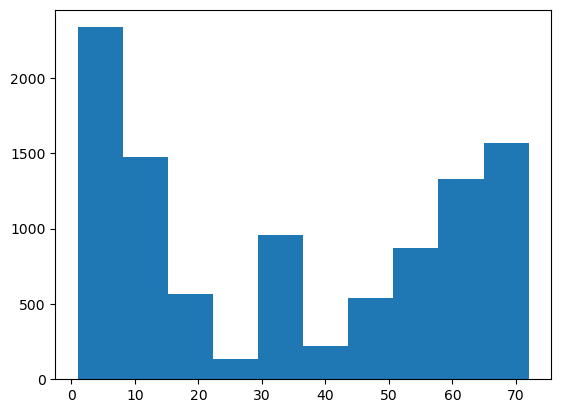

In [69]:
plt.hist(churned_data["Tenure"])
plt.show

# Looks bimodal, will try boxplot

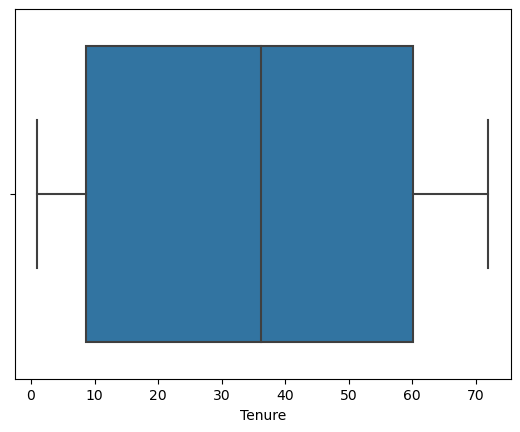

In [70]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_Tenure = seaborn.boxplot(x = "Tenure", data = churned_data)


In [71]:
# Since the population is bimodal, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Tenure_q1, Tenure_q3 = np.percentile(churned_data["Tenure"], [25,75])
print(Tenure_q1, Tenure_q3)

Tenure_iqr = Tenure_q3 - Tenure_q1
print(Tenure_iqr)

Tenure_lower_limit = Tenure_q1 - (1.5*Tenure_iqr)
Tenure_upper_limit = Tenure_q3 + (1.5*Tenure_iqr)
print(Tenure_lower_limit, Tenure_upper_limit)


## No noticeable outliers!

8.700329255749999 60.1534875
51.45315824425
-68.479408110625 137.333224866375


<function matplotlib.pyplot.show(close=None, block=None)>

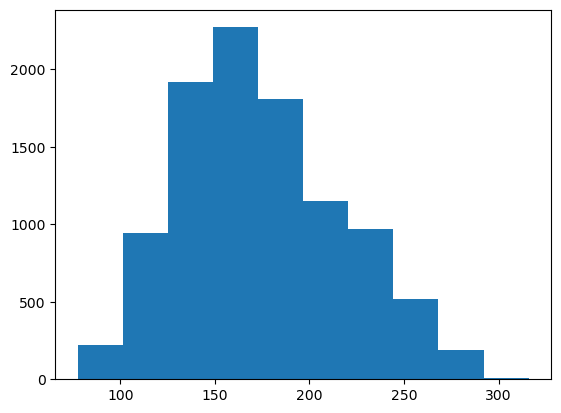

In [72]:
plt.hist(churned_data["MonthlyCharge"])
plt.show

# Looks normal with maybe slight right skew, will try z-score then boxplots

<function matplotlib.pyplot.show(close=None, block=None)>

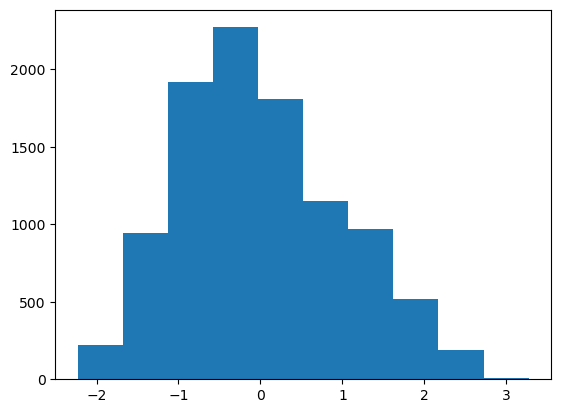

In [73]:
# Checking Z-scores for "MonthlyCharge"
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

churned_data["Z_Score_MonthlyCharge"] = stats.zscore(churned_data["MonthlyCharge"])
#churned_data[["MonthlyCharge", "Z_Score_MonthlyCharge"]].head()

plt.hist(churned_data["Z_Score_MonthlyCharge"])
plt.show


In [74]:
# Checking boxplot as well
# seaborn.boxplot(x = "MonthlyCharge", data = churned_data)
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

churned_data.query('Z_Score_MonthlyCharge > 3 | Z_Score_MonthlyCharge < -3').info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 927 to 4700
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3 non-null      int64  
 1   CaseOrder              3 non-null      int64  
 2   Customer_id            3 non-null      object 
 3   Interaction            3 non-null      object 
 4   City                   3 non-null      object 
 5   State                  3 non-null      object 
 6   County                 3 non-null      object 
 7   Zip                    3 non-null      int64  
 8   Lat                    3 non-null      float64
 9   Lng                    3 non-null      float64
 10  Population             3 non-null      int64  
 11  Area                   3 non-null      object 
 12  Timezone               3 non-null      object 
 13  Job                    3 non-null      object 
 14  Children               3 non-null      float64
 15  Age  

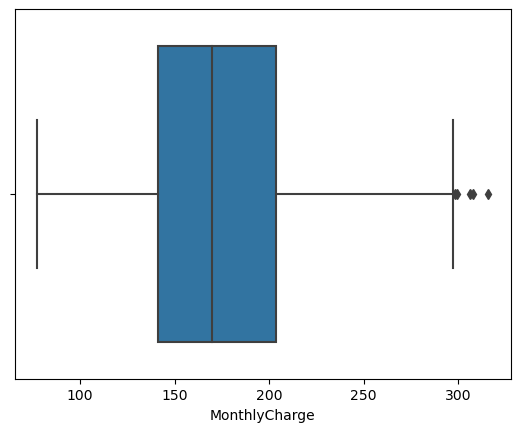

In [75]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data)

In [76]:
# Also want to check for the interquartile range to know where the value of potential outliers might lie
MonthlyCharge_q1, MonthlyCharge_q3 = np.percentile(churned_data["MonthlyCharge"], [25,75])
print(MonthlyCharge_q1, MonthlyCharge_q3)

MonthlyCharge_iqr = MonthlyCharge_q3 - MonthlyCharge_q1
print(MonthlyCharge_iqr)

MonthlyCharge_lower_limit = MonthlyCharge_q1 - (1.5*MonthlyCharge_iqr)
MonthlyCharge_upper_limit = MonthlyCharge_q3 + (1.5*MonthlyCharge_iqr)
print(MonthlyCharge_lower_limit, MonthlyCharge_upper_limit)


# I will check the max and min outlier to check the range of outliers
print("Min Range of Outliers: ", churned_data["MonthlyCharge"].min(), "To", MonthlyCharge_lower_limit - 1)
print("Max Range of Outliers: ", MonthlyCharge_upper_limit + 1, "To", churned_data["MonthlyCharge"].max() )

141.07107845 203.777441275
62.706362825000014
47.01153421249997 297.8369855125
Min Range of Outliers:  77.50523 To 46.01153421249997
Max Range of Outliers:  298.8369855125 To 315.8786


In [77]:
# Check the query for how many outliers there are
churned_data[churned_data["MonthlyCharge"] > MonthlyCharge_upper_limit].count()


Unnamed: 0               5
CaseOrder                5
Customer_id              5
Interaction              5
City                     5
State                    5
County                   5
Zip                      5
Lat                      5
Lng                      5
Population               5
Area                     5
Timezone                 5
Job                      5
Children                 5
Age                      5
Education                5
Employment               5
Income                   5
Marital                  5
Gender                   5
Churn                    5
Outage_sec_perweek       5
Email                    5
Contacts                 5
Yearly_equip_failure     5
Techie                   5
Contract                 5
Port_modem               5
Tablet                   5
InternetService          5
Phone                    5
Multiple                 5
OnlineSecurity           5
OnlineBackup             5
DeviceProtection         5
TechSupport              5
S

<function matplotlib.pyplot.show(close=None, block=None)>

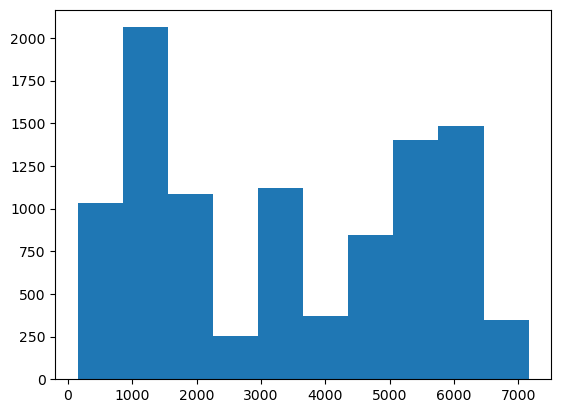

In [78]:
plt.hist(churned_data["Bandwidth_GB_Year"])
plt.show

# Looks bimodal, will try boxplots

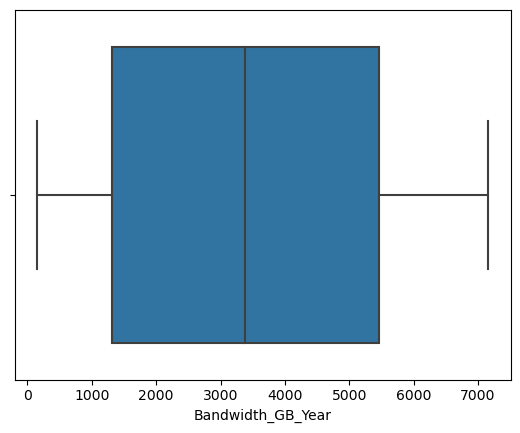

In [79]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

boxplot_Bandwidth_GB_Year = seaborn.boxplot(x = "Bandwidth_GB_Year", data = churned_data)

In [80]:
# Since the population is skewed right, we won't use Z-scores to detect outliers. Instead I will try to use boxplots
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Bandwidth_GB_Year_q1, Bandwidth_GB_Year_q3 = np.percentile(churned_data["Bandwidth_GB_Year"], [25,75])
print(Bandwidth_GB_Year_q1, Bandwidth_GB_Year_q3)

Bandwidth_GB_Year_iqr = Bandwidth_GB_Year_q3 - Bandwidth_GB_Year_q1
print(Bandwidth_GB_Year_iqr)

Bandwidth_GB_Year_lower_limit = Bandwidth_GB_Year_q1 - (1.5*Bandwidth_GB_Year_iqr)
Bandwidth_GB_Year_upper_limit = Bandwidth_GB_Year_q3 + (1.5*Bandwidth_GB_Year_iqr)
print(Bandwidth_GB_Year_lower_limit, Bandwidth_GB_Year_upper_limit)


1312.130487 5466.2845
4154.154012999999
-4919.100532499999 11697.515519499999


In [81]:






## GOING TO TREAT THE OUTLIERS FOR EACH VARIABLES AS NECESSARY. WANT TO DO IT AFTER CHECKING FOR CODE CONSISTENCY







In [82]:


## POPULATION

## CHOOSING TO RETAIN



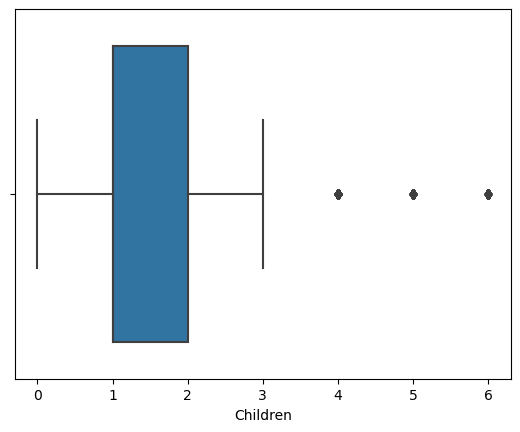

In [83]:


## CHILDREN
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

## Removing the  instances outlier and rechecking the plot
Children_outliers = churned_data[ (churned_data["Children"] > Children_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Children"] > Children_upper_limit)].index, inplace = True )
Children_removed_outliers = seaborn.boxplot(x = "Children", data = churned_data)



In [84]:
churned_data[ (churned_data["Children"] > 3)].count()

## Going to keep the rest of the outliers

Unnamed: 0               1065
CaseOrder                1065
Customer_id              1065
Interaction              1065
City                     1065
State                    1065
County                   1065
Zip                      1065
Lat                      1065
Lng                      1065
Population               1065
Area                     1065
Timezone                 1065
Job                      1065
Children                 1065
Age                      1065
Education                1065
Employment               1065
Income                   1065
Marital                  1065
Gender                   1065
Churn                    1065
Outage_sec_perweek       1065
Email                    1065
Contacts                 1065
Yearly_equip_failure     1065
Techie                   1065
Contract                 1065
Port_modem               1065
Tablet                   1065
InternetService          1065
Phone                    1065
Multiple                 1065
OnlineSecu

In [85]:


## AGE

## NO OUTLIERS DETECTED



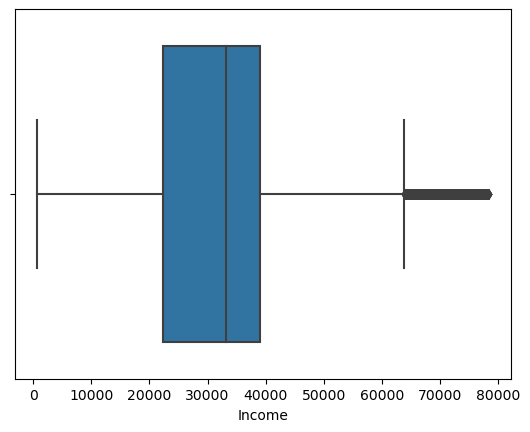

In [86]:


## INCOME
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

## Removing the  instances outlier and rechecking the plot
Income_outliers = churned_data[ (churned_data["Income"] > Income_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Income"] > Income_upper_limit)].index, inplace = True )
Income_removed_outliers = seaborn.boxplot(x = "Income", data = churned_data)

## Although there are still more outliers, I kept re-doing this process and it always created more outliers. Since I don't want
## to exclude too many and have the range of income be so small, I'm going to stop after the intial outlier drop and have the
## income range be from 0 to 78269.


C:\Users\cfman\AppData\Local\Temp\ipykernel_15356\3361480949.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outage_sec_perweek_outliers.append(churned_data[(churned_data["Outage_sec_perweek"] < Outage_lower_limit)])


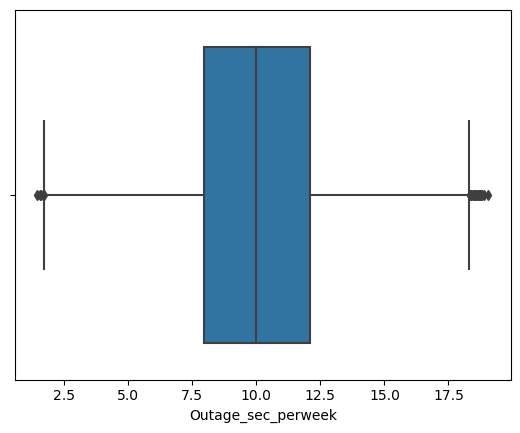

In [87]:


## OUTAGE_SEC_PERWEEK
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

## Removing the values < 0
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < 0)].index, inplace = True )

## Removing the  instances outlier and rechecking the plot
Outage_sec_perweek_outliers = churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)]
Outage_sec_perweek_outliers.append(churned_data[(churned_data["Outage_sec_perweek"] < Outage_lower_limit)])
#Outage_sec_perweek_outliers.info()

churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < Outage_lower_limit)].index, inplace = True )

Outage_sec_perweek_removed_outliers = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)


## I think the rest of the outliers look ok except there are a few values that are less than 0. Intuitively that does not make
## sense as we are looking at total seconds so it can't be less than 0. I will remove those outliers as well


C:\Users\cfman\AppData\Local\Temp\ipykernel_15356\3525185244.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Email_outliers.append(churned_data[(churned_data["Email"] < Email_lower_limit)])


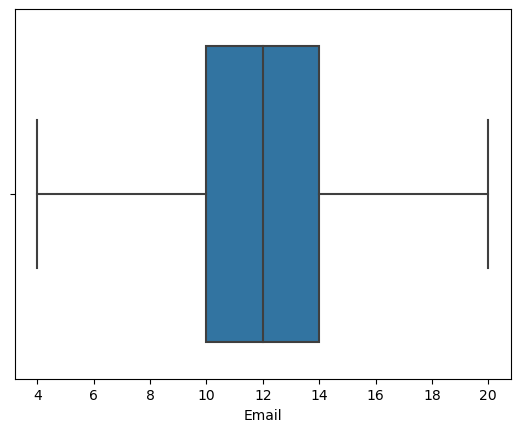

In [88]:


## Email
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

## Removing the  instances outlier and rechecking the plot
Email_outliers = churned_data[ (churned_data["Email"] > Email_upper_limit)]
Email_outliers.append(churned_data[(churned_data["Email"] < Email_lower_limit)])

#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Email"] > Email_upper_limit)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Email"] < Email_lower_limit)].index, inplace = True )
Email_removed_outliers = seaborn.boxplot(x = "Email", data = churned_data)


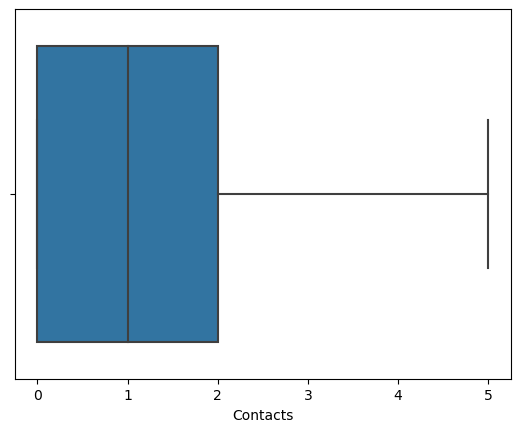

In [89]:


## CONTACTS
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

## Removing the  instances outlier and rechecking the plot
Contacts_outliers = churned_data[ (churned_data["Contacts"] > Contacts_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Contacts"] > Contacts_upper_limit)].index, inplace = True )
Contacts_removed_outliers = seaborn.boxplot(x = "Contacts", data = churned_data)




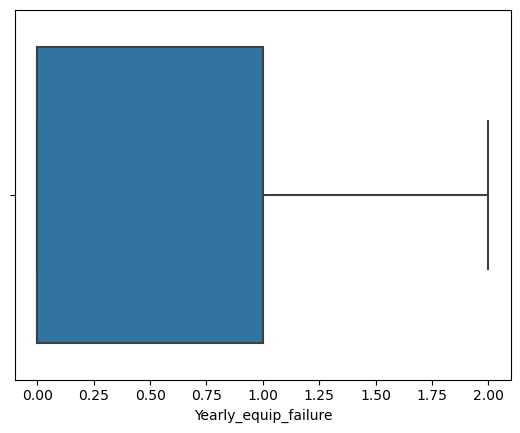

In [90]:


## YEARLY_EQUIP_FAILURE 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]


Yearly_equip_failure_outliers = churned_data[ (churned_data["Yearly_equip_failure"] > Yearly_equip_failure_upper_limit)]
#Yearly_equip_failure_outliers.info()

churned_data.drop(churned_data[ (churned_data["Yearly_equip_failure"] > Yearly_equip_failure_upper_limit)].index, inplace = True )
Yearly_equip_failure_removed_outliers = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)



In [91]:


## TENURE

## NO OUTLIERS DETECTED



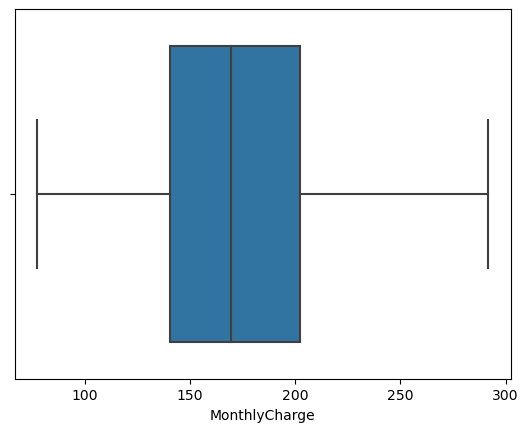

In [92]:


## MonthlyCharge
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Detecting and Treating Outliers]

## Removing the  instances outlier and rechecking the plot
MonthlyCharge_outliers = churned_data[ (churned_data["MonthlyCharge"] > MonthlyCharge_upper_limit)]
#MonthlyCharge_outliers.info()

churned_data.drop(churned_data[ (churned_data["MonthlyCharge"] > MonthlyCharge_upper_limit)].index, inplace = True )
MonthlyCharge_removed_outliers = seaborn.boxplot(x = "MonthlyCharge", data = churned_data)


In [93]:


## Bandwidth_GB_Year

## NO OUTLIERS DETECTED



In [94]:
churned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8236 non-null   int64  
 1   CaseOrder              8236 non-null   int64  
 2   Customer_id            8236 non-null   object 
 3   Interaction            8236 non-null   object 
 4   City                   8236 non-null   object 
 5   State                  8236 non-null   object 
 6   County                 8236 non-null   object 
 7   Zip                    8236 non-null   int64  
 8   Lat                    8236 non-null   float64
 9   Lng                    8236 non-null   float64
 10  Population             8236 non-null   int64  
 11  Area                   8236 non-null   object 
 12  Timezone               8236 non-null   object 
 13  Job                    8236 non-null   object 
 14  Children               8236 non-null   float64
 15  Age 

In [95]:






## LOOKING AT THE RE-EXPRESSION OF CATEGORICAL VARIABLES







In [96]:
## Education is a clear ORDINAL categorical variable so I will convert
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Re-Expression of Categorical Variables]

churned_data["Education"].unique()
#len(churned_data["Education"].unique())

## So we have 12 types of data, time to create the new column and dictionary per Dr. Middleton's Video Lecture
## D206 - Getting Started With D206 | Re-expression of Categorical Variables

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Some College, Less than 1 Year', 'Nursery School to 8th Grade',
       'Professional School Degree'], dtype=object)

In [97]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Re-Expression of Categorical Variables]

churned_data["Education_Numeric"] = churned_data["Education"]
dict_edu = {"Education_Numeric": {"No Schooling Completed": 0, "Nursery School to 8th Grade": 1, 
                                  "9th Grade to 12th Grade, No Diploma": 2, "GED or Alternative Credential": 3, 
                                  "Regular High School Diploma": 4, "Some College, Less than 1 Year": 5,
                                 "Some College, 1 or More Years, No Degree": 6, "Associate's Degree": 7, 
                                 "Professional School Degree": 8, "Bachelor's Degree": 9, 
                                 "Master's Degree": 10, "Doctorate Degree": 11, "unknown": np.NaN}}
churned_data.replace(dict_edu, inplace = True)

In [98]:
## Just to check to make sure we don't have any missing values
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Re-Expression of Categorical Variables]

#print("Amount of missing values: ", churned_data["Education_Numeric"].isna().sum())
#print(churned_data["Education_Numeric"].head())
churned_data.Education_Numeric.unique()

array([10,  4, 11,  0,  7,  9,  3,  6,  2,  5,  1,  8], dtype=int64)

In [99]:
## Replacing all Yes/No responses with an int value corresponding to Yes = 1 and No = 0.
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Re-Expression of Categorical Variables]

churned_data = churned_data.replace({"Yes": 1, "No": 0})


In [100]:
## Doing one last check for duplicates or missing values to ensure data quality
print(churned_data.shape)

duplicates_end = churned_data.duplicated(keep = False)
duplicates_end.value_counts()

## So we can see there are no duplicates, but the overall data set has gotten smaller. That is to be expected because of our
## exclusion of many outliers from the quantitative variables

(8236, 55)


False    8236
dtype: int64

In [101]:
churned_data.isna().sum()

## Still no missing values 

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                      0
Education                0
Employment               0
Income                   0
Marital                  0
Gender                   0
Churn                    0
Outage_sec_perweek       0
Email                    0
Contacts                 0
Yearly_equip_failure     0
Techie                   0
Contract                 0
Port_modem               0
Tablet                   0
InternetService          0
Phone                    0
Multiple                 0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
S

In [102]:
## Exporting the new data frame to a CSV file

churned_data.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D206DataCleaning/churn_cleaned_data.csv')

In [103]:





## Principal Component Analysis






In [104]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

from sklearn.decomposition import PCA

In [105]:
## Normalizing the continuous quantitative variables and putting into a dataframe
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

churned_Cont_Var = churned_data[["Income", "Outage_sec_perweek", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"]]

churned_normalized = (churned_Cont_Var - churned_Cont_Var.mean()) / churned_Cont_Var.std()

In [106]:
## Checking out many PCA variables
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

pca = PCA(n_components = churned_Cont_Var.shape[1])

In [107]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

pca.fit(churned_normalized)

PCA(n_components=5)

In [108]:
## Converting back into a dataframe
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

churned_data_PCA = pd.DataFrame(pca.transform(churned_normalized),
                               columns = ["PC1", "PC2", "PC3", "PC4","PC5"])

In [109]:
## Finding the relationships (loadings) to the PCs
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

loadings = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4","PC5"], index=churned_Cont_Var.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Income,0.008275,-0.038237,0.944864,-0.325109,-0.002147
Outage_sec_perweek,0.022178,0.706773,-0.204492,-0.676814,-0.009300
Tenure,0.705476,-0.060490,-0.018728,-0.024699,-0.705467
MonthlyCharge,0.041623,0.703806,0.255074,0.659924,-0.048600
Bandwidth_GB_Year,0.707114,-0.002798,-0.000974,0.010829,0.707010


In [110]:
## Keep all PCs with eigenvalue greater than or equal to 1. Also going to create a scree plot
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

covariance_matrix = np.dot(churned_normalized.T, churned_normalized) / churned_Cont_Var.shape[0]

eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]

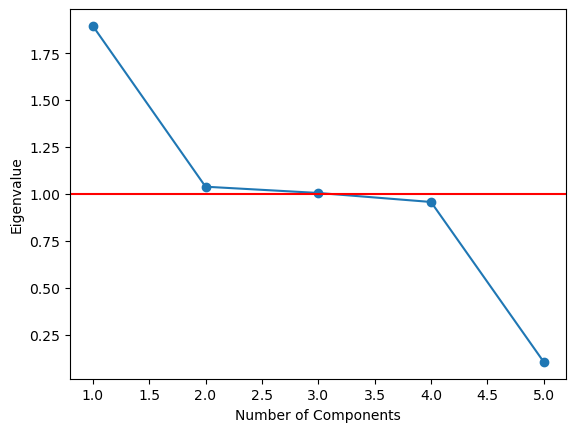

In [113]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Principal Component Analysis(PCA)]

plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker = 'o')
plt.xlabel("Number of Components")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color = "red")
plt.show()

In [112]:
## From this plot, it looks like we would keep PCA1, PCA2, and PCA3 as they are all greater than or equal to 1